<a href="https://colab.research.google.com/github/braginkit/neural-networks-with-Python/blob/main/%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Варинт 4

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

Считаем данные

In [ ]:
train = pd.read_csv("svmdata4.txt", delim_whitespace=True).drop("ID", axis=1)
test = pd.read_csv("svmdata4test.txt", delim_whitespace=True).drop("ID", axis=1)

Заглянем в них

In [ ]:
train.head()

,X1,X2,Colors
0,11.503087,-0.872017,green
1,6.952235,-0.368240,red
2,9.157642,1.058048,green
3,3.921632,1.703045,green
4,4.019569,0.706163,green


In [ ]:
test.shape, train.shape

((200, 3), (200, 3))

Преобразуем текстовые данные в числовые с помощью label encoding

In [ ]:
test.Colors = test.Colors.map({
    "green": 0,
    "red": 1
})

train.Colors = train.Colors.map({
    "green": 0,
    "red": 1
})

In [ ]:
test.head()

,X1,X2,Colors
0,5.722018,-0.401993,0
1,4.673020,-0.968013,0
2,8.791324,-1.998983,1
3,2.491248,1.143857,0
4,3.805128,1.329185,0


Подготовим выборки для анализа

In [ ]:
X_train = train.drop("Colors", axis=1)
X_test = test.drop("Colors", axis=1)
y_train = train.Colors
y_test = test.Colors

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((200, 2), (200,), (200, 2), (200,))

Для наглядности изобразим выборки

Text(0.5, 1.0, 'Data points')

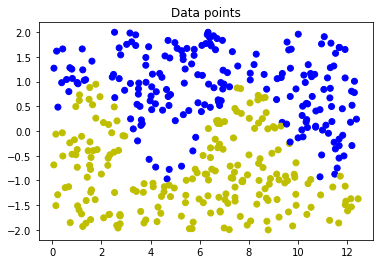

In [ ]:
plt.scatter(X_train.X1, X_train.X2, c=y_train.map({
        0: "b",  
        1: "y" 
    })
)
plt.scatter(X_test.X1, X_test.X2, c=y_test.map({
        0: "b",  
        1: "y" 
    })
)
plt.title("Data points")

В данной работе предстоит решать задачу бинарной классификации. Попробуем сделать это 3 разными методами. В качестве метрики качества будем использовать accuracy

In [ ]:
from sklearn.metrics import accuracy_score

Из графика выше сразу видно, что линейные методы не годятся, так как выборка линейно неразделима.  
Начнем с наивных баесовских классификаторов

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [ ]:
gaussian = GaussianNB().fit(X_train, y_train)
bernoulli = BernoulliNB().fit(X_train, y_train)

Изобразим визуально их решения на тестовой выборке

Text(0.5, 0, 'BernoulliNB')

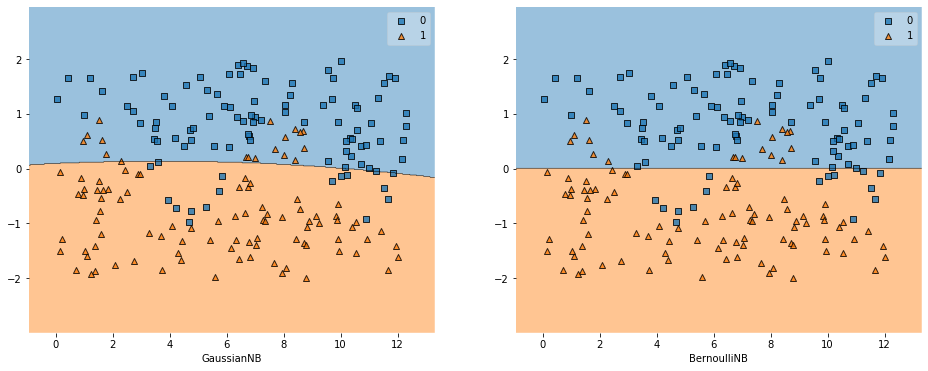

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_decision_regions(X_test.to_numpy(), y_test.to_numpy(), clf=gaussian)
plt.xlabel("GaussianNB")
plt.subplot(1, 2, 2)
plot_decision_regions(X_test.to_numpy(), y_test.to_numpy(), clf=bernoulli)
plt.xlabel("BernoulliNB")

Посчитаем качество

In [ ]:
print(f"GaussianNB accuracy: {accuracy_score(y_train, gaussian.predict(X_train))}")
print(f"BernoulliNB accuracy: {accuracy_score(y_train, gaussian.predict(X_train))}")

GaussianNB accuracy: 0.87
BernoulliNB accuracy: 0.87


Как видим, у них одинаковое качество

Теперь попробуем достаточно простой, но мощный алгоритм k ближайших соседей. Поскольку у него есть гиперпараметры - как минимум число соседей и метрика расстояния, то нужно будет также подобрать оптимальные гиперпараметры

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
please = GridSearchCV(KNeighborsClassifier(), param_grid={
    "n_neighbors": np.arange(1, 50), 
    "p": [1, 2]
}).fit(X_test, y_test)

Выясним, какие параметры оказались лучшими

In [ ]:
please.best_params_

{'n_neighbors': 1, 'p': 2}

Изобразим решение

Text(0.5, 1.0, 'KNN')

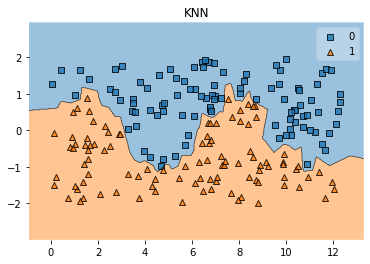

In [ ]:
plot_decision_regions(X_test.to_numpy(), y_test.to_numpy(), clf=please)
plt.title("KNN")

Посчитаем качество

In [ ]:
accuracy_score(y_test, please.predict(X_test))

1.0

Очевидно, что лучше уже невозможно, но для приличия рассмотрим еще один метод - построим композицию решающих деревьев методом бэггинга. Гиперпараметром тут будет являться количество деревьев

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
mystery_trees = GridSearchCV(BaggingClassifier(base_estimator=DecisionTreeClassifier()), param_grid={
    "n_estimators": np.arange(2, 10)
}).fit(X_train, y_train)

Лучшие параметры

In [ ]:
mystery_trees.best_params_

{'n_estimators': 5}

Изобразим решение

Text(0.5, 1.0, 'Decision tree')

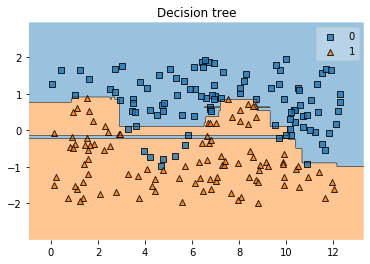

In [ ]:
plot_decision_regions(X_test.to_numpy(), y_test.to_numpy(), clf=mystery_trees)
plt.title("Decision tree")

Посчитаем качество

In [ ]:
accuracy_score(y_test, mystery_tree.predict(X_test))

0.895

Качество немного лучше, чем у наивного классификатора

### Вывод  
В результате выполнения данной лабораторной работы по машинному обучению, на практике были изучены Байесовский классификатор, классификатор kNN и процесс построения решающих деревьев методом бэггинга, была произведена оценка точности моделей с помощью метрики accuracy, в результате чего было выявлено, что успешнее других показал себя классификатор kNN с 1 ближайшим соседом.